# Library

In [ ]:
import zipfile
import tensorflow as tf
import os
import shutil
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
# !wget "https://zenodo.org/records/7224690/files/FruQ-DB.zip?download=1"

In [ ]:
# with zipfile.ZipFile("FruQ-DB.zip?download=1", 'r') as zip_ref:
#     zip_ref.extractall("FruQ-DB")

In [ ]:
!wget "https://zenodo.org/records/7224690/files/FruQ-multi.zip?download=1"

--2024-11-25 10:26:14--  https://zenodo.org/records/7224690/files/FruQ-multi.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.185.79.172, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4661201538 (4.3G) [application/octet-stream]
Saving to: ‘FruQ-multi.zip?download=1’

FruQ-multi.zip?down 100%[===================>]   4.34G  12.7MB/s    in 3m 50s  

2024-11-25 10:30:04 (19.4 MB/s) - ‘FruQ-multi.zip?download=1’ saved [4661201538/4661201538]



In [ ]:
with zipfile.ZipFile("FruQ-multi.zip?download=1", 'r') as zip_ref:
    zip_ref.extractall("datasetbuah")

# Preparation Data

Menata Ulang Data

In [ ]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # Path ke dataset
# base_dir = "datasetbuah/FruQ-multi"
# output_dir = "datasetmodeljadi"  # Direktori output untuk split dataset
# categories = {
#     "BananaDB": ["Good", "mild", "Rotten"],
#     "CucumberQ": ["Fresh", "Mild", "Rotten"],
#     "GrapeQ": ["Good", "Mild", "Rotten"]
# }

# # Fungsi untuk memindahkan file ke folder tertentu
# def move_files(file_list, source_dir, target_dir):
#     os.makedirs(target_dir, exist_ok=True)
#     for file in file_list:
#         shutil.copy(os.path.join(source_dir, file), target_dir)

# # Proses splitting untuk setiap kategori dan label
# for category, labels in categories.items():
#     for label in labels:
#         # Path ke folder spesifik
#         folder_path = os.path.join(base_dir, category, label)
#         if not os.path.exists(folder_path):
#             print(f"Folder {folder_path} tidak ditemukan, dilewati.")
#             continue

#         # List file dalam folder
#         files = os.listdir(folder_path)

#         # Split dataset (80% train, 20% test)
#         train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

#         # Path untuk output train/test tanpa kategori
#         train_dir = os.path.join(output_dir, "train", label)
#         test_dir = os.path.join(output_dir, "test", label)

#         # Pindahkan file
#         move_files(train_files, folder_path, train_dir)
#         move_files(test_files, folder_path, test_dir)

# print("Dataset berhasil dipisahkan menjadi train dan test.")


Dataset berhasil dipisahkan menjadi train dan test.


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path ke dataset
base_dir = "datasetbuah/FruQ-multi"
output_dir = "datasetmodel"  # Direktori output untuk split dataset
categories = {
    "BananaDB": ["Good", "mild", "Rotten"],
    "CucumberQ": ["Fresh", "Mild", "Rotten"],
    "GrapeQ": ["Good", "Mild", "Rotten"]
}

# Fungsi untuk memindahkan file ke folder tertentu
def move_files(file_list, source_dir, target_dir):
    os.makedirs(target_dir, exist_ok=True)
    for file in file_list:
        shutil.copy(os.path.join(source_dir, file), target_dir)

# Fungsi untuk menentukan nama folder berdasarkan kategori
def get_fruit_name(category):
    if category == "BananaDB":
        return "banana"
    elif category == "CucumberQ":
        return "cucumber"
    elif category == "GrapeQ":
        return "grape"
    return None

# Proses splitting untuk setiap kategori dan label
for category, labels in categories.items():
    # Tentukan nama folder buah sesuai kategori
    fruit_folder = get_fruit_name(category)
    if not fruit_folder:
        print(f"Kategori {category} tidak dikenali.")
        continue

    for label in labels:
        # Path ke folder spesifik
        folder_path = os.path.join(base_dir, category, label)
        if not os.path.exists(folder_path):
            print(f"Folder {folder_path} tidak ditemukan, dilewati.")
            continue

        # List file dalam folder
        files = os.listdir(folder_path)

        # Split dataset (80% train, 20% test)
        train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

        # Path untuk output train/test dengan struktur folder sesuai buah
        train_dir = os.path.join(output_dir, "train", fruit_folder, label)
        test_dir = os.path.join(output_dir, "test", fruit_folder, label)

        # Pindahkan file ke direktori yang tepat
        move_files(train_files, folder_path, train_dir)
        move_files(test_files, folder_path, test_dir)

print("Dataset berhasil dipisahkan menjadi train dan test.")


Dataset berhasil dipisahkan menjadi train dan test.


In [ ]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # Path ke dataset
# base_dir = "datasetbuah/FruQ-multi"
# output_dir = "datasetmodeljadi"  # Direktori output untuk split dataset
# categories = {
#     "test": ["Fresh", "Good", "Mild", "Rotten", "mild"],  # Menambahkan kategori yang akan digabungkan
#     "train": ["Fresh", "Good", "Mild", "Rotten", "mild"],
# }

# # Fungsi untuk memindahkan file ke folder tertentu
# def move_files(file_list, source_dir, target_dir):
#     os.makedirs(target_dir, exist_ok=True)
#     for file in file_list:
#         shutil.copy(os.path.join(source_dir, file), target_dir)

# # Proses splitting untuk setiap kategori dan label
# for category, labels in categories.items():
#     for label in labels:
#         # Menggabungkan label "Fresh" dan "Good", serta "Mild" dan "mild"
#         if label in ["Good", "Fresh"]:
#             combined_label = "Fresh"  # Gabungkan Good dan Fresh menjadi Fresh
#         elif label in ["Mild", "mild"]:
#             combined_label = "Mild"  # Gabungkan Mild dan mild menjadi Mild
#         else:
#             combined_label = label

#         # Path ke folder spesifik
#         folder_path = os.path.join(base_dir, category, label)
#         if not os.path.exists(folder_path):
#             print(f"Folder {folder_path} tidak ditemukan, dilewati.")
#             continue

#         # List file dalam folder
#         files = os.listdir(folder_path)

#         # Split dataset (80% train, 20% test)
#         train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

#         # Path untuk output train/test dengan label yang telah digabung
#         train_dir = os.path.join(output_dir, "train", combined_label)
#         test_dir = os.path.join(output_dir, "test", combined_label)

#         # Pindahkan file
#         move_files(train_files, folder_path, train_dir)
#         move_files(test_files, folder_path, test_dir)

# print("Dataset berhasil dipisahkan menjadi train dan test.")


Dataset berhasil dipisahkan menjadi train dan test.


Eksploratory Data

In [9]:
import os

# Path ke direktori dataset
base_dir = "datasetmodel"  # Ganti dengan path dataset Anda

# Kategori dan label yang ingin dihitung
categories = {
    "test": {
        "banana": ["Fresh", "Mild", "Rotten"],
        "cucumber": ["Fresh", "Mild", "Rotten"],
        "grape": ["Fresh", "Mild", "Rotten"]
    },
    "train": {
        "banana": ["Fresh", "Mild", "Rotten"],
        "cucumber": ["Fresh", "Mild", "Rotten"],
        "grape": ["Fresh", "Mild", "Rotten"]
    },
}

# Fungsi untuk menghitung file dalam folder
def count_files(base_dir, categories):
    result = {}
    for category, fruits in categories.items():
        result[category] = {}
        for fruit, labels in fruits.items():
            result[category][fruit] = {}
            for label in labels:
                folder_path = os.path.join(base_dir, category, fruit, label)
                if os.path.exists(folder_path):
                    # Hitung jumlah file dalam folder
                    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
                    result[category][fruit][label] = num_files
                else:
                    result[category][fruit][label] = 0  # Jika folder tidak ada, hitungannya 0
    return result

# Hitung jumlah file untuk data train dan test
file_counts = count_files(base_dir, categories)

# Print hasil
for category, fruits in file_counts.items():
    print(f"\nJumlah file dalam data {category}:")
    for fruit, labels in fruits.items():
        print(f"  {fruit}:")
        for label, count in labels.items():
            print(f"    {label}: {count} file")



Jumlah file dalam data test:
  banana:
    Fresh: 36 file
    Mild: 20 file
    Rotten: 68 file
  cucumber:
    Fresh: 50 file
    Mild: 69 file
    Rotten: 24 file
  grape:
    Fresh: 46 file
    Mild: 39 file
    Rotten: 58 file

Jumlah file dalam data train:
  banana:
    Fresh: 143 file
    Mild: 76 file
    Rotten: 269 file
  cucumber:
    Fresh: 200 file
    Mild: 276 file
    Rotten: 92 file
  grape:
    Fresh: 181 file
    Mild: 155 file
    Rotten: 230 file


Contoh gambar dari kategori: train


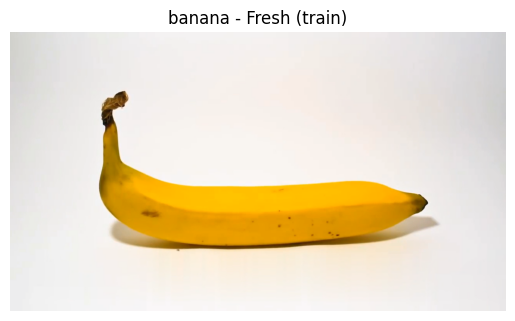

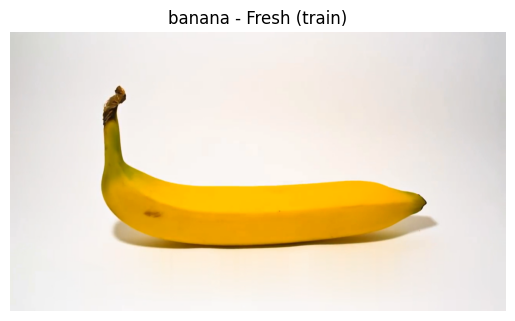

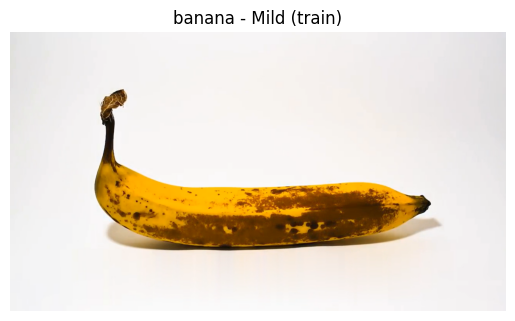

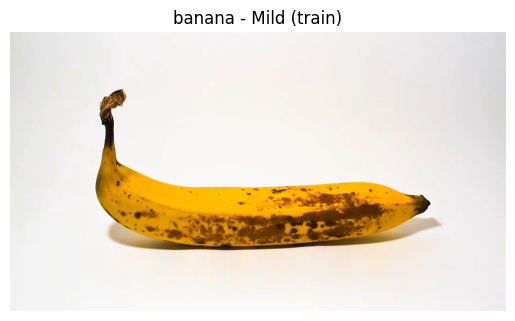

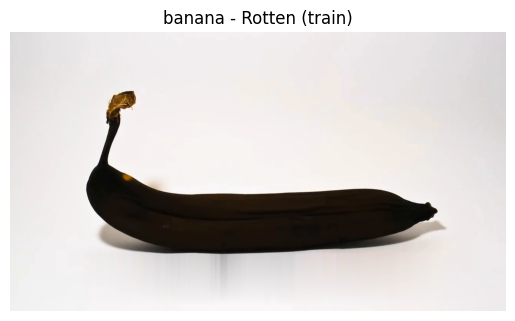

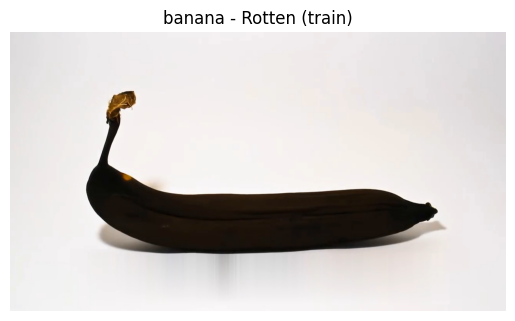

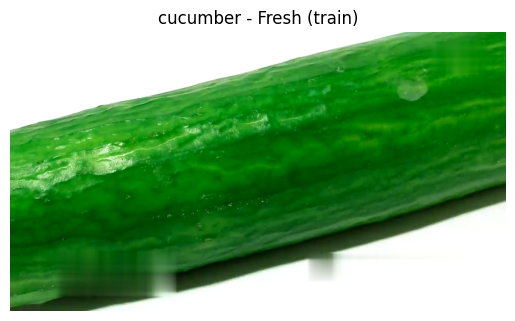

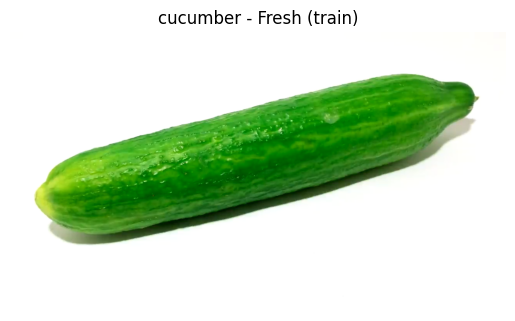

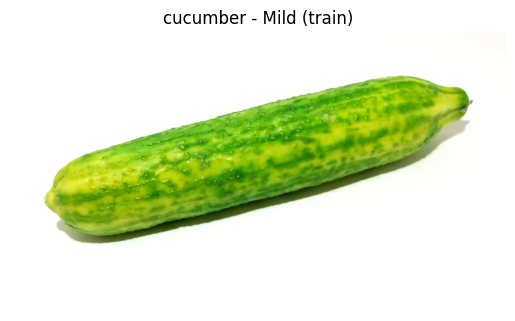

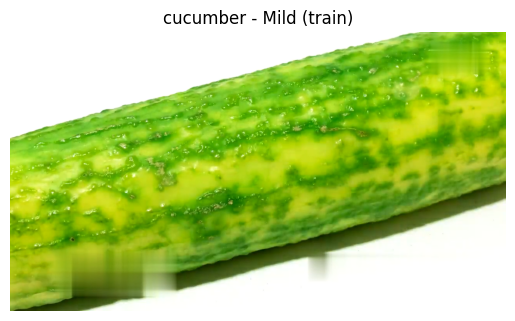

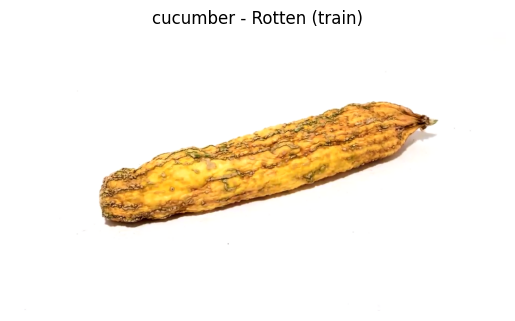

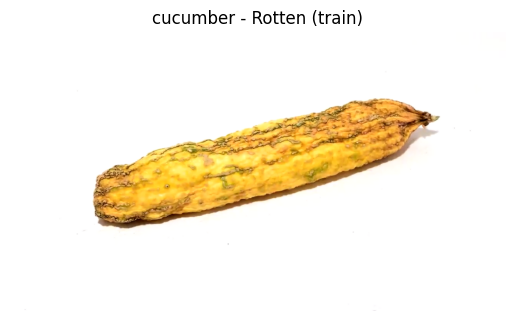

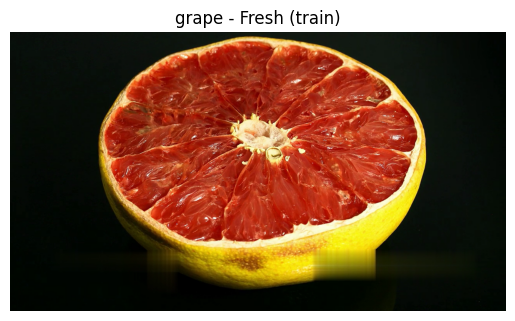

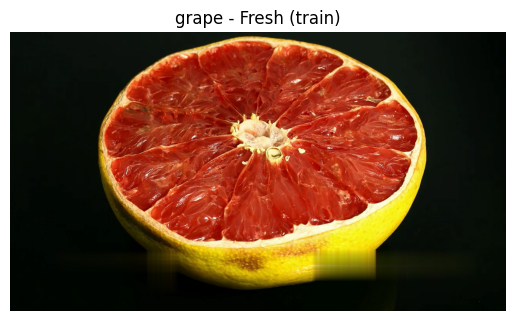

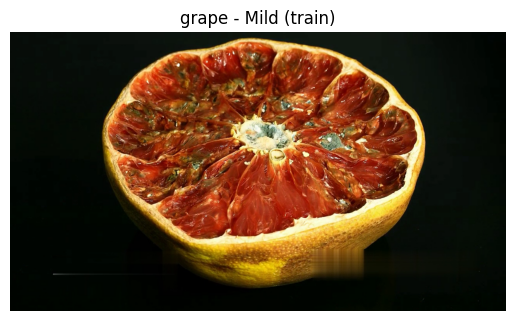

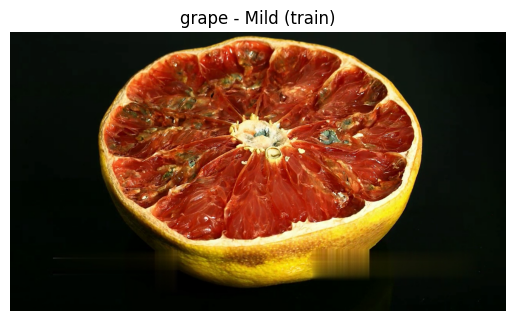

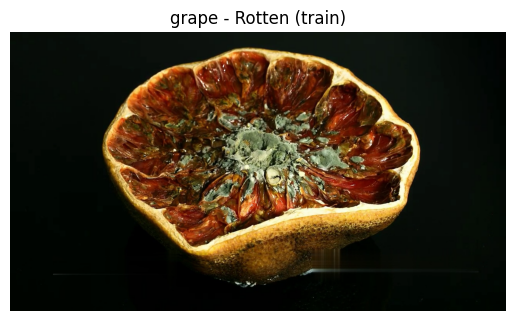

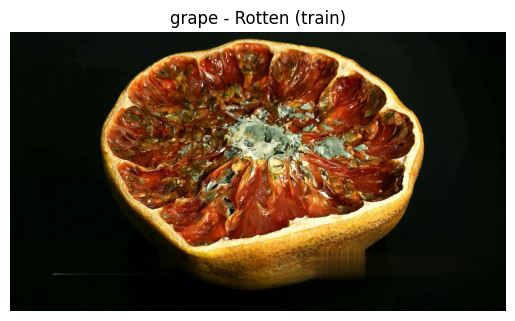

Contoh gambar dari kategori: test


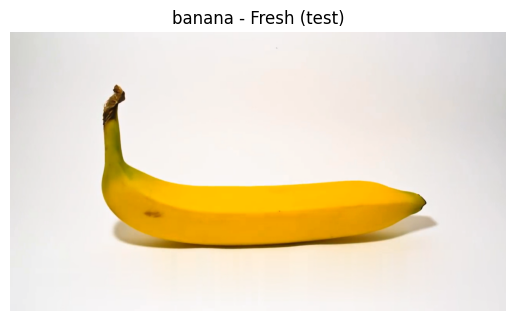

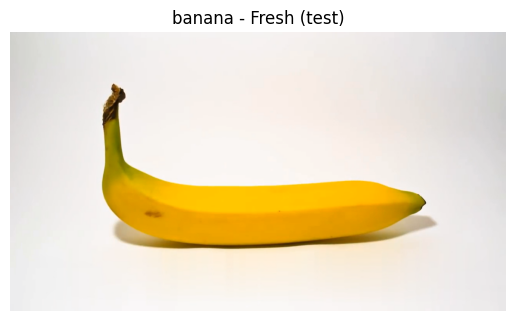

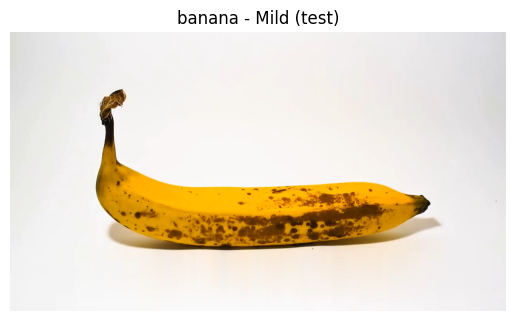

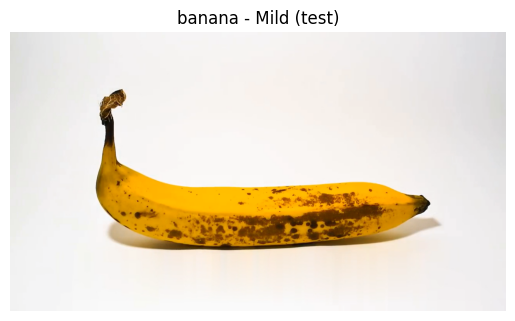

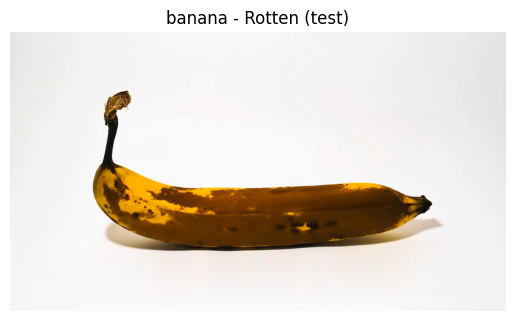

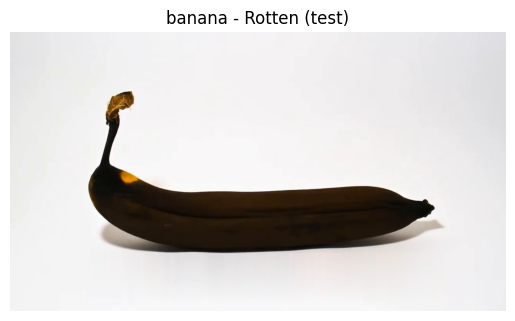

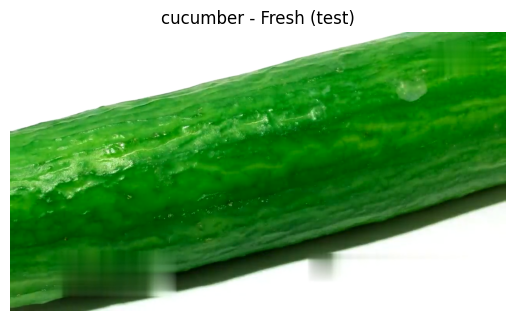

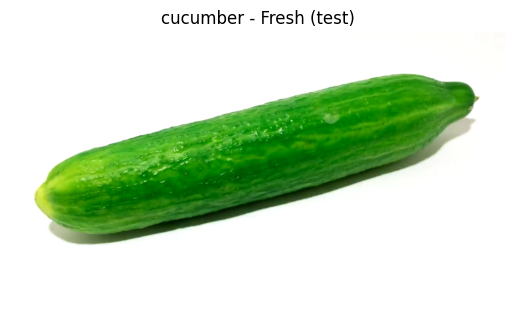

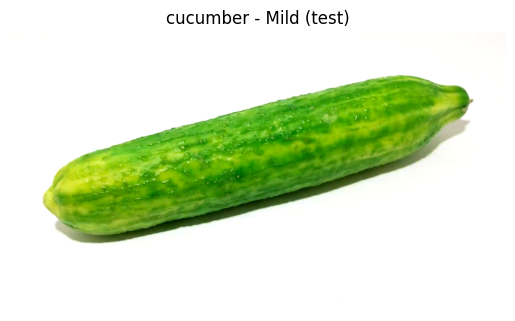

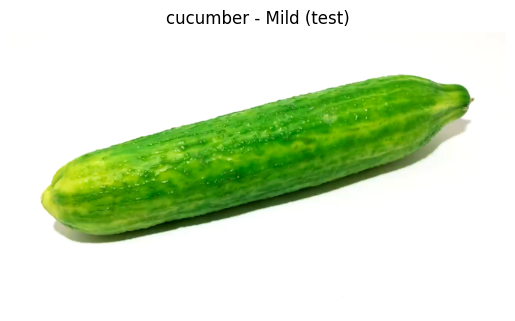

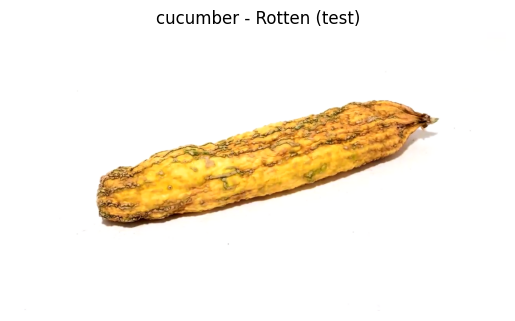

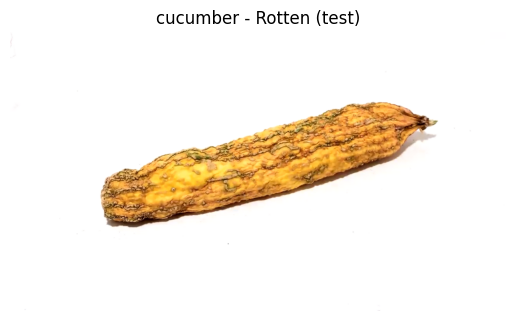

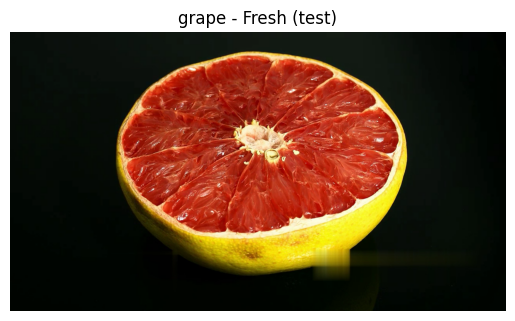

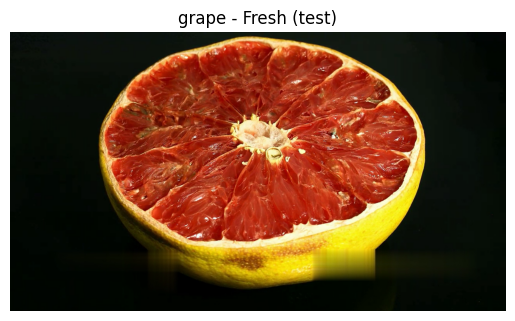

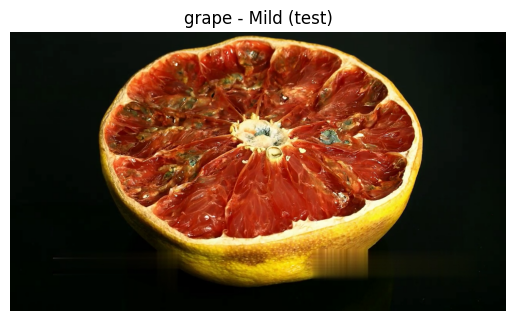

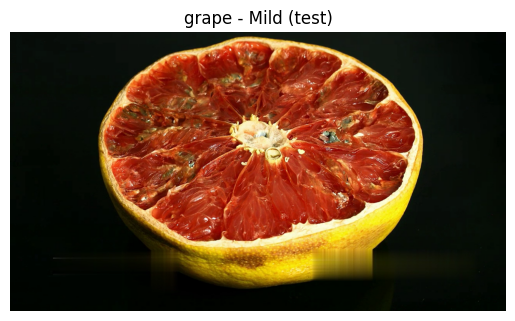

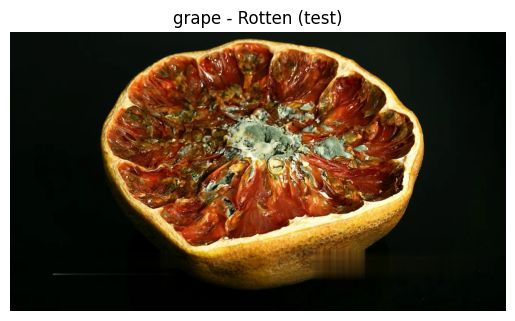

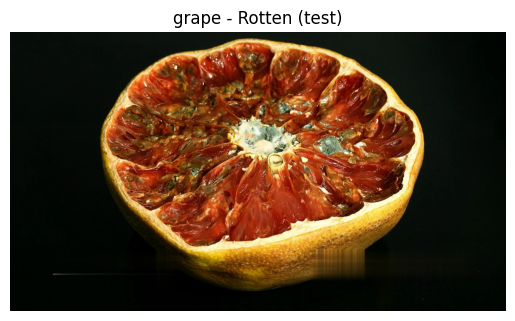

In [8]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Fungsi untuk menampilkan contoh gambar
def display_sample_images(base_dir, categories, num_samples=2):
    for category, fruits in categories.items():  # category adalah 'train' atau 'test'
        print(f"Contoh gambar dari kategori: {category}")
        for fruit, labels in fruits.items():  # fruit adalah 'banana', 'cucumber', 'grape'
            for label in labels:  # label adalah 'Good', 'Mild', 'Rotten'
                dir_path = os.path.join(base_dir, category, fruit, label)
                if os.path.exists(dir_path):
                    # Ambil beberapa file secara acak
                    files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]
                    if len(files) > 0:
                        sample_files = random.sample(files, k=min(num_samples, len(files)))

                        # Tampilkan gambar
                        for file in sample_files:
                            img_path = os.path.join(dir_path, file)
                            img = mpimg.imread(img_path)
                            plt.imshow(img)
                            plt.title(f"{fruit} - {label} ({category})")
                            plt.axis('off')
                            plt.show()
                    else:
                        print(f"Tidak ada file gambar di {dir_path}.")
                else:
                    print(f"Folder untuk {label} di kategori {category} dan buah {fruit} tidak ditemukan.")

# Tentukan struktur kategori dan label
categories = {
    "train": {
        "banana": ["Fresh", "Mild", "Rotten"],
        "cucumber": ["Fresh", "Mild", "Rotten"],
        "grape": ["Fresh", "Mild", "Rotten"]
    },
    "test": {
        "banana": ["Fresh", "Mild", "Rotten"],
        "cucumber": ["Fresh", "Mild", "Rotten"],
        "grape": ["Fresh", "Mild", "Rotten"]
    }
}

# Tentukan base_dir sesuai dengan lokasi dataset Anda
base_dir = "datasetmodel"  # Ganti dengan path dataset Anda

# Panggil fungsi untuk menampilkan contoh gambar
display_sample_images(base_dir, categories, num_samples=2)


In [10]:
print(os.listdir("datasetmodel"))

['test', 'train']


In [11]:
print(os.listdir("datasetmodel/train"))
print(os.listdir("datasetmodel/test"))

['cucumber', 'banana', 'grape']
['cucumber', 'banana', 'grape']


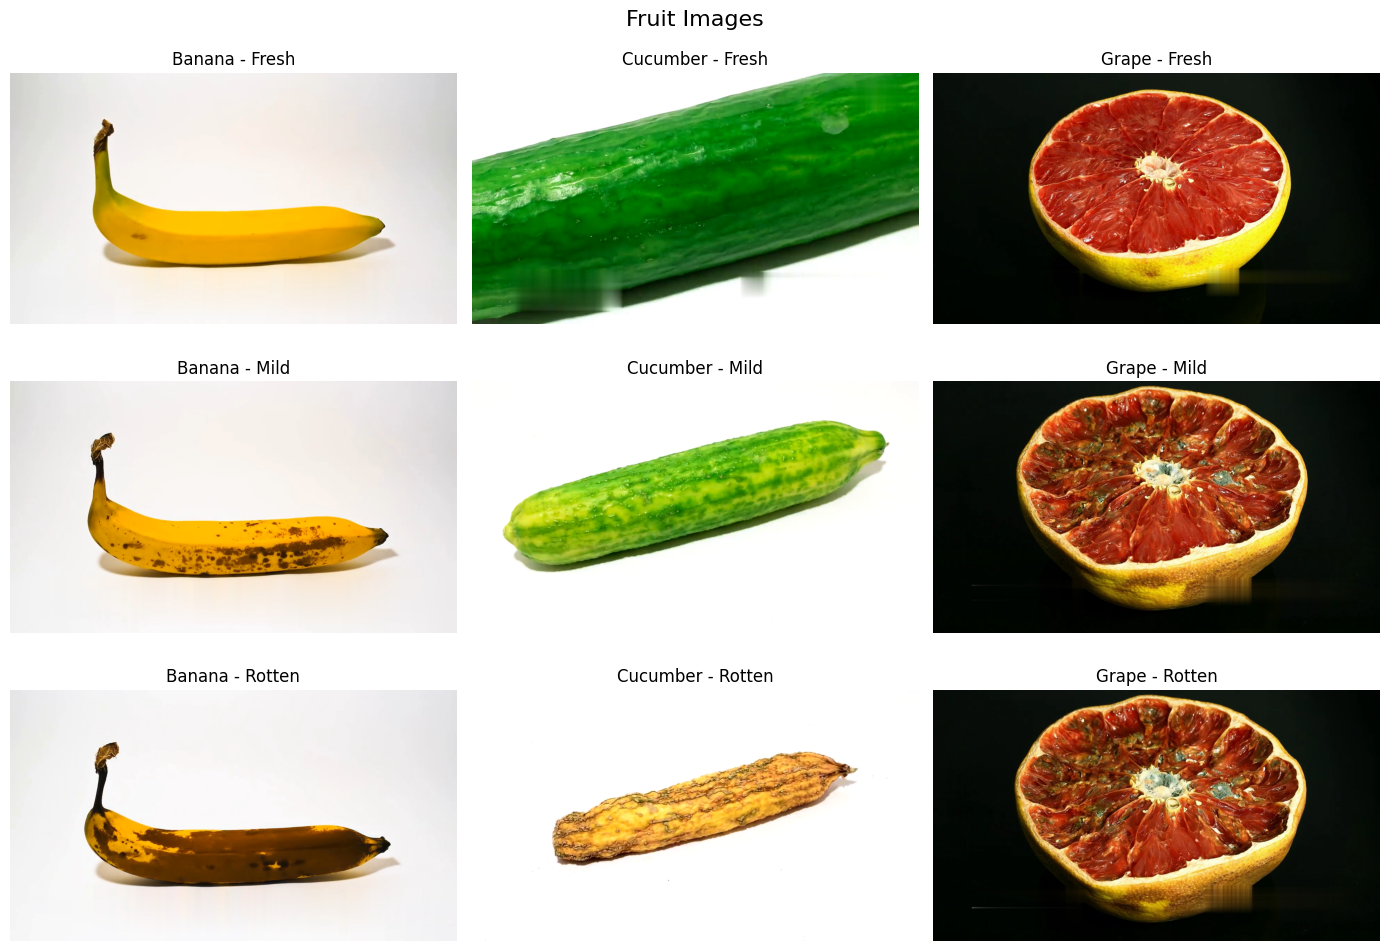

In [12]:
# Setup subplot untuk 3x3 grid (3 buah dan 3 kondisi)
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
fig.suptitle('Fruit Images', fontsize=16)

# List buah dan kondisi
fruits = ['banana', 'cucumber', 'grape']
conditions = ['Fresh', 'Mild', 'Rotten']

# Loop melalui buah dan kondisi untuk menampilkan gambar
for i, fruit in enumerate(fruits):
    for j, condition in enumerate(conditions):
        # Path ke gambar berdasarkan buah dan kondisi
        dir_path = f'datasetmodel/train/{fruit}/{condition}'

        # Pastikan ada file di folder tersebut
        files = os.listdir(dir_path)
        if files:
            # Load gambar pertama dari folder
            img_path = os.path.join(dir_path, files[0])
            img = tf.keras.preprocessing.image.load_img(img_path)

            # Tampilkan gambar pada subplot yang sesuai
            axes[j, i].imshow(img)
            axes[j, i].set_title(f'{fruit.capitalize()} - {condition}')
            axes[j, i].axis('off')  # Matikan axis untuk tampilan gambar yang lebih bersih
        else:
            axes[j, i].axis('off')  # Matikan axis jika tidak ada gambar
            axes[j, i].set_title(f'No images for {fruit.capitalize()} - {condition}')

# Tampilkan hasil plot
plt.tight_layout()
plt.show()

In [13]:
# Convert the image into its numpy array representation
sample_array = tf.keras.preprocessing.image.img_to_array(img)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (720, 1280, 3)


In [14]:
sample_array[0,:5]

array([[ 7., 12.,  8.],
       [ 7., 12.,  8.],
       [ 7., 12.,  8.],
       [ 7., 12.,  8.],
       [ 7., 12.,  8.]], dtype=float32)

In [15]:
import os
import cv2

# Tentukan folder dataset
dataset_dir = 'datasetmodel'

# Tentukan ukuran baru
new_size = (224, 224)

# Fungsi untuk meresize gambar
def resize_images_in_folder(folder_path, new_size):
    # Daftar buah dan kondisi
    fruits = ['banana', 'cucumber', 'grape']
    conditions = ['Fresh', 'Mild', 'Rotten']

    # Loop melalui buah dan kondisi untuk meresize gambar
    for fruit in fruits:
        for condition in conditions:
            subfolder_path = os.path.join(folder_path, fruit, condition)

            # Pastikan folder tersebut ada
            if os.path.exists(subfolder_path):
                # Loop melalui gambar di dalam subfolder
                for filename in os.listdir(subfolder_path):
                    file_path = os.path.join(subfolder_path, filename)

                    # Periksa jika file tersebut adalah gambar
                    if filename.endswith(('.jpg', '.jpeg', '.png')):
                        # Baca gambar
                        image = cv2.imread(file_path)

                        # Resize gambar
                        resized_image = cv2.resize(image, new_size)

                        # Simpan gambar yang sudah diresize (menimpa file asli atau simpan di folder baru)
                        cv2.imwrite(file_path, resized_image)
                        print(f"Resized {file_path}")
            else:
                print(f"Folder {subfolder_path} tidak ditemukan.")

# Resize gambar di dalam folder train dan test
for folder in ['train', 'test']:
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.exists(folder_path):
        resize_images_in_folder(folder_path, new_size)
    else:
        print(f"Folder {folder} tidak ditemukan.")

Resized datasetmodel/train/banana/Fresh/Image67.png
Resized datasetmodel/train/banana/Fresh/Image243.png
Resized datasetmodel/train/banana/Fresh/Image141.png
Resized datasetmodel/train/banana/Fresh/Image63.png
Resized datasetmodel/train/banana/Fresh/Image47.png
Resized datasetmodel/train/banana/Fresh/Image353.png
Resized datasetmodel/train/banana/Fresh/Image239.png
Resized datasetmodel/train/banana/Fresh/Image223.png
Resized datasetmodel/train/banana/Fresh/Image205.png
Resized datasetmodel/train/banana/Fresh/Image159.png
Resized datasetmodel/train/banana/Fresh/Image293.png
Resized datasetmodel/train/banana/Fresh/Image217.png
Resized datasetmodel/train/banana/Fresh/Image343.png
Resized datasetmodel/train/banana/Fresh/Image151.png
Resized datasetmodel/train/banana/Fresh/Image185.png
Resized datasetmodel/train/banana/Fresh/Image319.png
Resized datasetmodel/train/banana/Fresh/Image95.png
Resized datasetmodel/train/banana/Fresh/Image183.png
Resized datasetmodel/train/banana/Fresh/Image275.p

In [16]:
import os
import shutil

# Tentukan direktori dataset lama (sumber)
source_train_dir = 'datasetmodel/train'
source_test_dir = 'datasetmodel/test'

# Tentukan direktori dataset baru (tujuan)
new_dataset_dir = 'dataset_baru'

# Daftar buah dan kondisi
fruits = ['banana', 'cucumber', 'grape']
conditions = ['Fresh', 'Mild', 'Rotten']

# Membuat folder untuk dataset baru
def create_folders(dataset_dir, fruits, conditions):
    for fruit in fruits:
        for condition in conditions:
            # Membuat folder untuk setiap kombinasi buah dan kondisi (train dan test)
            for split in ['train', 'test']:
                folder_path = os.path.join(dataset_dir, split, f"{fruit}_{condition}")
                os.makedirs(folder_path, exist_ok=True)
                print(f"Folder dibuat: {folder_path}")

# Memindahkan gambar ke folder yang sesuai
def move_images(source_dir, dataset_dir, fruits, conditions, split):
    for fruit in fruits:
        for condition in conditions:
            # Tentukan folder sumber untuk buah dan kondisi yang sesuai
            source_folder = os.path.join(source_dir, fruit, condition)
            destination_folder = os.path.join(dataset_dir, split, f"{fruit}_{condition}")

            # Periksa apakah folder sumber ada
            if os.path.exists(source_folder):
                # Pindahkan gambar ke folder yang sesuai di dataset baru
                for filename in os.listdir(source_folder):
                    file_path = os.path.join(source_folder, filename)
                    if os.path.isfile(file_path):
                        shutil.copy(file_path, destination_folder)
                        print(f"Memindahkan {filename} ke {destination_folder}")

# Buat folder di dataset baru
create_folders(new_dataset_dir, fruits, conditions)

# Pindahkan gambar untuk train dan test
for split in ['train', 'test']:
    # Tentukan direktori sumber berdasarkan split (train/test)
    source_dir = source_train_dir if split == 'train' else source_test_dir
    move_images(source_dir, new_dataset_dir, fruits, conditions, split)

print("Proses pemindahan gambar selesai!")


Folder dibuat: dataset_baru/train/banana_Fresh
Folder dibuat: dataset_baru/test/banana_Fresh
Folder dibuat: dataset_baru/train/banana_Mild
Folder dibuat: dataset_baru/test/banana_Mild
Folder dibuat: dataset_baru/train/banana_Rotten
Folder dibuat: dataset_baru/test/banana_Rotten
Folder dibuat: dataset_baru/train/cucumber_Fresh
Folder dibuat: dataset_baru/test/cucumber_Fresh
Folder dibuat: dataset_baru/train/cucumber_Mild
Folder dibuat: dataset_baru/test/cucumber_Mild
Folder dibuat: dataset_baru/train/cucumber_Rotten
Folder dibuat: dataset_baru/test/cucumber_Rotten
Folder dibuat: dataset_baru/train/grape_Fresh
Folder dibuat: dataset_baru/test/grape_Fresh
Folder dibuat: dataset_baru/train/grape_Mild
Folder dibuat: dataset_baru/test/grape_Mild
Folder dibuat: dataset_baru/train/grape_Rotten
Folder dibuat: dataset_baru/test/grape_Rotten
Memindahkan Image67.png ke dataset_baru/train/banana_Fresh
Memindahkan Image243.png ke dataset_baru/train/banana_Fresh
Memindahkan Image141.png ke dataset_ba

In [17]:
train_dir = 'dataset_baru/train'
test_dir = 'dataset_baru/test'

# Create Model

# Create Augmentation

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=400,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=400,
        class_mode='categorical')

Found 1622 images belonging to 9 classes.
Found 410 images belonging to 9 classes.


In [20]:
# Membuat tf.data.Dataset untuk training dan validasi
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 3), dtype=tf.float32)
    ))

In [21]:
# Menambahkan cache dan prefetch untuk mempercepat pemuatan data
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      37,749,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,437,449 (146.63 MB)

 Trainable params: 38,437,449 (146.63 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [25]:
history = model.fit(
      train_generator,
      epochs=20,
      validation_data=validation_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 318s 55s/step - accuracy: 0.1686 - loss: 2.7190 - val_accuracy: 0.2634 - val_loss: 1.5476
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 322s 56s/step - accuracy: 0.4156 - loss: 1.3540 - val_accuracy: 0.6780 - val_loss: 0.9931
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 317s 55s/step - accuracy: 0.7067 - loss: 0.8237 - val_accuracy: 0.8585 - val_loss: 0.3791
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 334s 61s/step - accuracy: 0.8448 - loss: 0.3855 - val_accuracy: 0.8000 - val_loss: 0.6698
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 311s 71s/step - accuracy: 0.7646 - loss: 0.6327 - val_accuracy: 0.8146 - val_loss: 0.4927
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 310s 55s/step - accuracy: 0.8417 - loss: 0.4217 - val_accuracy: 0.8244 - val_loss: 0.3248
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 321s 55s/step - accuracy: 0.8549 - loss: 0.3075 - val_accuracy: 0.9390 - val_loss: 0.1793
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 310s 55s/step - accuracy: 0.9353 - loss: 0.1701 - val_accuracy: 0.9756 - val_loss: 0.0823
Epo

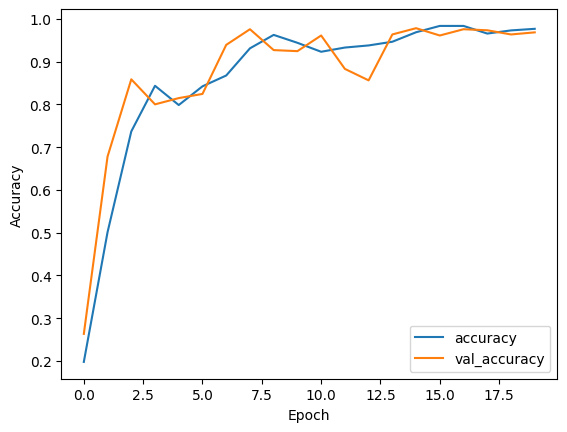

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [26]:
# Menyimpan model ke file .h5
model.save('model_buah.h5')
print("Model telah disimpan ke file 'model_buah.h5'")

Model telah disimpan ke file 'model_buah.h5'


In [37]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path ke gambar yang akan diprediksi
image_path = 'datasetbuah/FruQ-multi/StrawberryQ/Mild/Image1.png'

# Muat gambar dan ubah ukurannya ke (224, 224)
img = load_img(image_path, target_size=(224, 224))

# Konversi gambar menjadi array numpy
img_array = img_to_array(img)

# Normalisasi (sesuai preprocessing yang digunakan saat training)
img_array = img_array / 255.0

# Tambahkan dimensi batch (dari (224, 224, 3) ke (1, 224, 224, 3))
input_data = np.expand_dims(img_array, axis=0)


# Melakukan prediksi
predictions = model.predict(input_data)

# Menampilkan hasil prediksi
print("Prediksi Probabilitas:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Prediksi Probabilitas: [[7.1512777e-03 1.2602590e-02 7.4679047e-05 7.9328820e-05 1.1481268e-04
  9.7730905e-01 1.4134265e-05 2.5158157e-03 1.3827145e-04]]


In [41]:
import numpy as np

# Label kelas (sesuai urutan `train_generator.class_indices`)
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}  # Membalik mapping class_indices

# Cari indeks kelas dengan probabilitas tertinggi
predicted_index = np.argmax(predictions)

# Dapatkan nama kelas berdasarkan indeks
predicted_class = class_names[predicted_index]  # Nama kelas seperti 'banana_fresh'

# Memisahkan nama buah dan kondisi
fruit_name, condition = predicted_class.split('_')

# Format output
output = f"Buah: {fruit_name.capitalize()}, Kondisi: {condition.capitalize()}"
print(output)


Buah: Cucumber, Kondisi: Rotten


In [43]:
from google.colab import files
from PIL import Image
import io
import numpy as np
import tensorflow as tf

# Memuat file
uploaded = files.upload()

# Memproses setiap file yang diunggah
for file_name in uploaded.keys():
    # Membaca gambar menggunakan PIL
    image = Image.open(io.BytesIO(uploaded[file_name]))

    # Menampilkan gambar
    image.show()

    # Preprocessing gambar agar sesuai dengan model
    image = image.resize((224, 224))  # Sesuaikan ukuran dengan input model
    image_array = np.array(image) / 255.0  # Normalisasi nilai piksel
    image_array = np.expand_dims(image_array, axis=0)  # Tambahkan batch dimension

    # Melakukan prediksi
    predictions = model.predict(image_array)

    # Mengolah hasil prediksi
    class_indices = train_generator.class_indices
    class_names = {v: k for k, v in class_indices.items()}  # Membalik mapping
    predicted_index = np.argmax(predictions)
    predicted_class = class_names[predicted_index]

    # Memisahkan nama buah dan kondisi
    fruit_name, condition = predicted_class.split('_')
    output = f"Buah: {fruit_name.capitalize()}, Kondisi: {condition.capitalize()}"

    # Menampilkan hasil prediksi
    print(f"Hasil Prediksi untuk {file_name}: {output}")


Saving download (1).jpg to download (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Hasil Prediksi untuk download (1).jpg: Buah: Cucumber, Kondisi: Mild


# Create Model

MODEL